In [1]:
import os
import sys

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Racine du projet :", project_root)


Racine du projet : /Users/aliiii/Desktop/projects/ml-project-ue-a


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, precision_recall_curve

from src.ml_workflow import (
    load_data,
    preprocess_data,
    split_data,
    train_models,
    evaluate_models,
    select_features,
    plot_class_distribution,
    plot_correlation_heatmap,
    plot_pca_2d,
    plot_confusion_matrices,
    plot_roc_curves,
    plot_precision_recall_curves,
    plot_feature_importances_bar,
)


In [3]:
diab_path = os.path.join(project_root, "data", "diabetes", "diabetes_binary_health_indicators_BRFSS2015.csv")
df_diab = load_data(diab_path)

df_diab.shape, df_diab.head()


Dataset CSV chargé : 253680 lignes, 22 colonnes
Aperçu des données :
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  

((253680, 22),
    Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0   

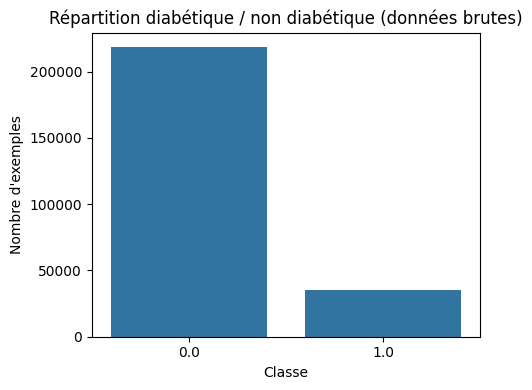

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64

In [4]:
y_raw = df_diab["Diabetes_binary"]
plot_class_distribution(y_raw, title="Répartition diabétique / non diabétique (données brutes)")
y_raw.value_counts(normalize=True)

In [5]:
df_diab_clean = preprocess_data(df_diab)

df_diab_clean.shape, df_diab_clean.head()


Aucune valeur manquante détectée.
Colonne cible détectée : 'Diabetes_binary'
Normalisation terminée : 22 variables (features + cible).


((253680, 22),
      HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
 0  1.153688  1.165254   0.196922  1.757936  1.120927 -0.205637   
 1 -0.866785 -0.858182  -5.078164 -0.511806  1.120927 -0.205637   
 2  1.153688  1.165254   0.196922 -0.057858 -0.892119 -0.205637   
 3  1.153688 -0.858182   0.196922 -0.209174 -0.892119 -0.205637   
 4  1.153688  1.165254   0.196922 -0.663122 -0.892119 -0.205637   
 
    HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  NoDocbcCost  \
 0             -0.322458     -1.762814 -1.316872  0.482087  ...    -0.303173   
 1             -0.322458      0.567275 -1.316872 -2.074316  ...     3.298445   
 2             -0.322458     -1.762814  0.759375 -2.074316  ...     3.298445   
 3             -0.322458      0.567275  0.759375  0.482087  ...    -0.303173   
 4             -0.322458      0.567275  0.759375  0.482087  ...    -0.303173   
 
     GenHlth  MentHlth  PhysHlth  DiffWalk       Sex       Age  Education  \
 0  2.329121  1.998592

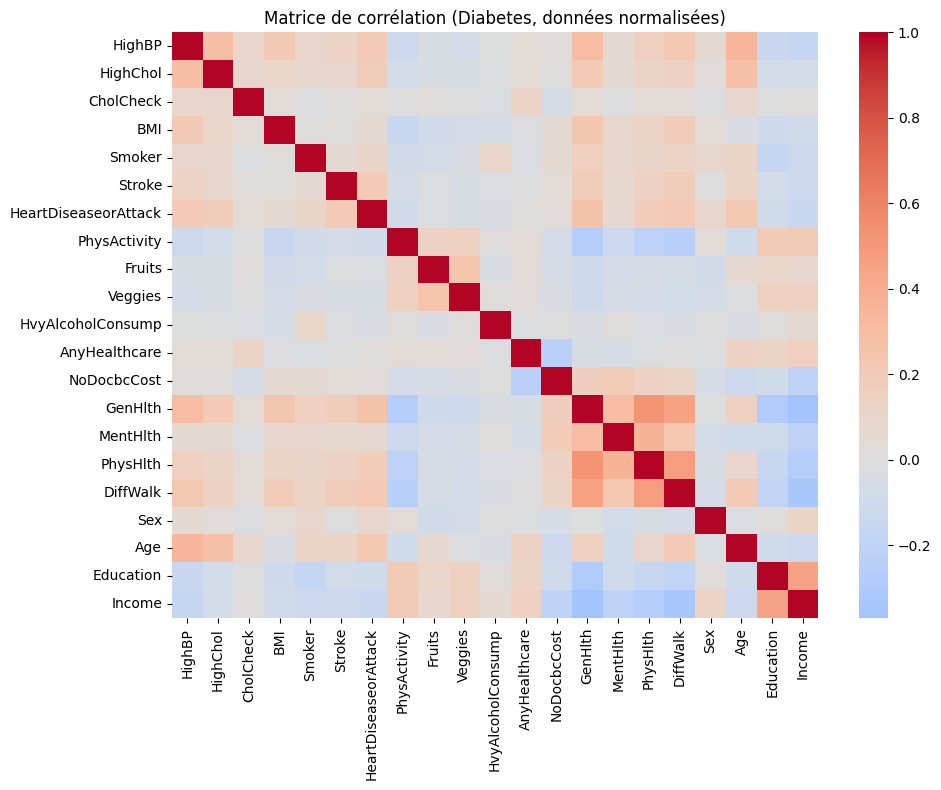

In [6]:
plot_correlation_heatmap(
    df_diab_clean,
    target_column="Diabetes_binary",
    max_features=30,
    title="Matrice de corrélation (Diabetes, données normalisées)"
)


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


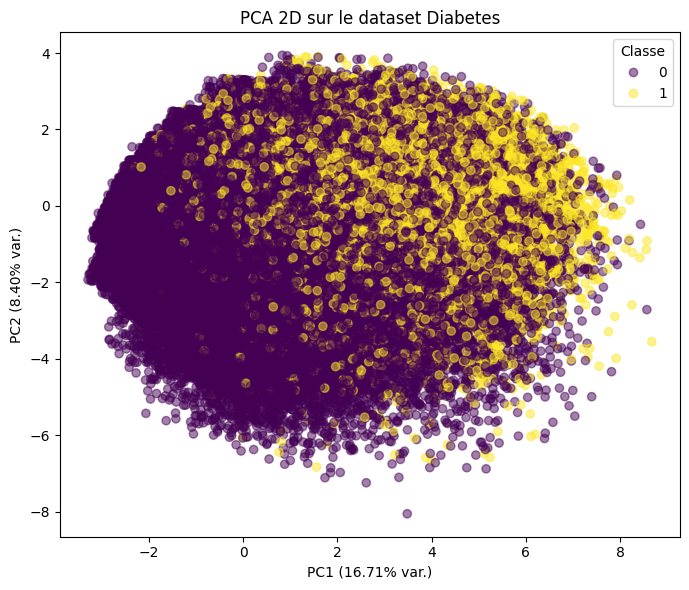

In [16]:
## PCA 2D 
X_pca = df_diab_clean.drop(columns=["Diabetes_binary"])
y_pca = df_diab_clean["Diabetes_binary"]

plot_pca_2d(
    X_pca,
    y_pca,
    title="PCA 2D sur le dataset Diabetes"
)


In [15]:
import warnings
from sklearn.decomposition import PCA

features = df_diab_clean.drop(columns=["Diabetes_binary"])

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    pca_95 = PCA(n_components=0.95)
    X_reduced95 = pca_95.fit_transform(features)

print("Composantes pour 95% de variance :", pca_95.n_components_)


Composantes pour 95% de variance : 19


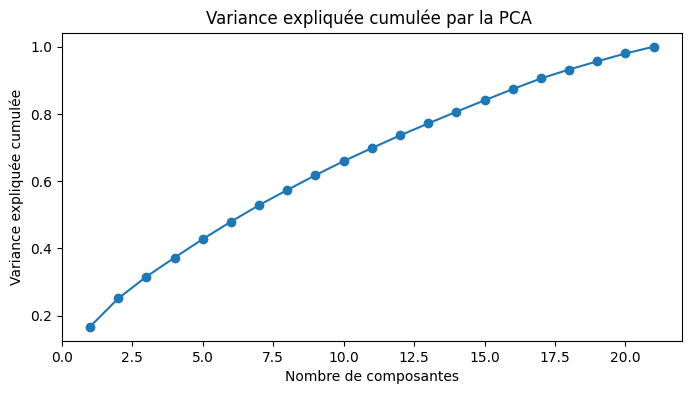

In [19]:
import warnings
from sklearn.decomposition import PCA

features = df_diab_clean.drop(columns=["Diabetes_binary"])

with warnings.catch_warnings():
    warnings.simplefilter("ignore", RuntimeWarning)
    pca_full = PCA()
    pca_full.fit(features)

var_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(var_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("Variance expliquée cumulée par la PCA ")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = split_data(
    df_diab_clean,
    target_column="Diabetes_binary"
)

X_train.shape, X_test.shape


Colonne cible utilisée : 'Diabetes_binary'
Split effectué : 202944 train / 50736 test


((202944, 21), (50736, 21))

In [9]:
models, results = train_models(X_train, X_test, y_train, y_test)

import pandas as pd
pd.DataFrame(results).T



Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.857 | F1: 0.234

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.858 | F1: 0.190

Entraînement du modèle : NeuralNet


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


NeuralNet entraîné — Accuracy: 0.865 | F1: 0.240

Résumé des performances :
RandomForest → Accuracy: 0.857 | F1: 0.234
KNN          → Accuracy: 0.858 | F1: 0.190
NeuralNet    → Accuracy: 0.865 | F1: 0.240


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


,accuracy,f1_score
RandomForest,0.856926,0.234040
KNN,0.858385,0.190057
NeuralNet,0.865401,0.239955


In [10]:
evaluations = evaluate_models(models, X_test, y_test)



🔍 Évaluation du modèle : RandomForest
Matrice de confusion :
[[42368  1299]
 [ 5960  1109]]

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43667
         1.0       0.46      0.16      0.23      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736


🔍 Évaluation du modèle : KNN
Matrice de confusion :
[[42708   959]
 [ 6226   843]]

Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43667
         1.0       0.47      0.12      0.19      7069

    accuracy                           0.86     50736
   macro avg       0.67      0.55      0.56     50736
weighted avg       0.82      0.86      0.82     50736


🔍 Évaluation du modèle : NeuralNet
Matrice de confusion :
[[42829   838]
 [ 5991  1078]]

Rapport de classific

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


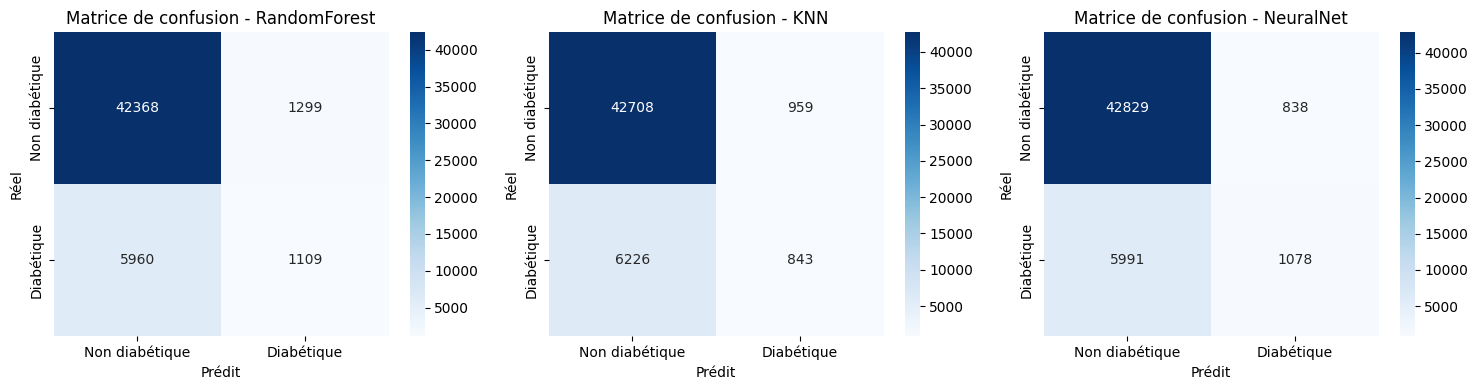

In [17]:
plot_confusion_matrices(
    models,
    X_test,
    y_test,
    class_names=["Non diabétique", "Diabétique"]
)


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


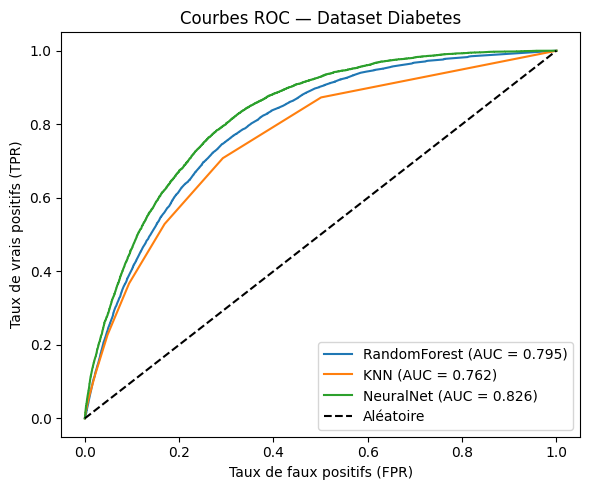

/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


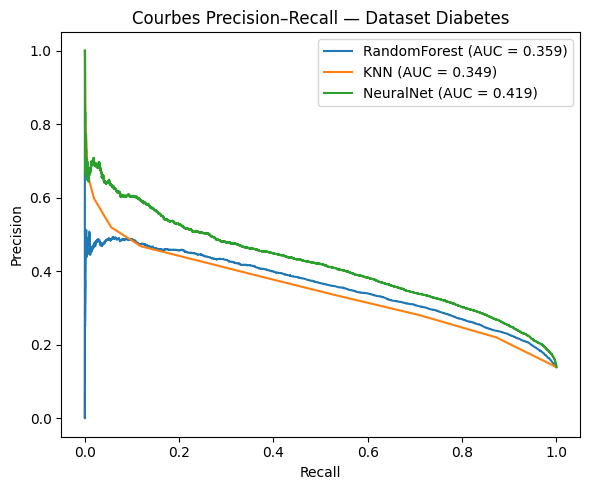

In [12]:
plot_roc_curves(
    models,
    X_test,
    y_test,
    title="Courbes ROC — Dataset Diabetes"
)

plot_precision_recall_curves(
    models,
    X_test,
    y_test,
    title="Courbes Precision–Recall — Dataset Diabetes"
)



Top 15 variables les plus importantes :
     Feature  Importance
         BMI    0.171739
         Age    0.126961
     GenHlth    0.105425
      Income    0.084547
      HighBP    0.076998
    PhysHlth    0.070357
   Education    0.058819
    MentHlth    0.053504
    HighChol    0.039644
      Smoker    0.027957
      Fruits    0.027955
    DiffWalk    0.025033
         Sex    0.024980
PhysActivity    0.022467
     Veggies    0.021927


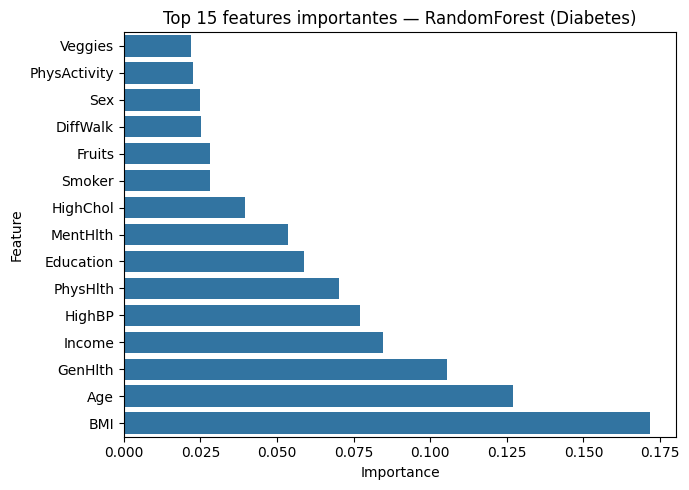

,Feature,Importance
0,BMI,0.171739
1,Age,0.126961
2,GenHlth,0.105425
3,Income,0.084547
4,HighBP,0.076998
5,PhysHlth,0.070357
6,Education,0.058819
7,MentHlth,0.053504
8,HighChol,0.039644
9,Smoker,0.027957


In [13]:
## Features importantes (RandomForest) 


rf_model = models["RandomForest"]

top_features_diab = select_features(
    rf_model,
    X_train,
    top_n=15
)

plot_feature_importances_bar(
    top_features_diab,
    title="Top 15 features importantes — RandomForest (Diabetes)"
)

top_features_diab
